In [1]:
import timeit
notebook_start_time = timeit.default_timer()
import os
import random
import sys 
print ("cwd:", os.getcwd()) 
print (sys.version_info)

import numpy as np
import matplotlib.pyplot as plt
import imageio

cwd: /home/ec2-user/kaggle/PlantSeedlings
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import torch, cv2

In [4]:
# This file contains all the main external libs we'll use
os.chdir("/home/ec2-user/fastai")
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
#added by AspiringGuru. 
import urllib.request 
import shutil 
import os.path

In [7]:
PATH = "/home/ec2-user/kaggleData/seedlings/"
#NB: this dir has had data configured to dir structure expected by fast.ai packages
sz=224  #resize images to this size
#NB: check if we need to cull images smaller than this size.


In [8]:
print ("torch.cuda.is_available():", torch.cuda.is_available())
print ("torch.backends.cudnn.enabled:", torch.backends.cudnn.enabled)
print (sys.version_info)

torch.cuda.is_available(): True
torch.backends.cudnn.enabled: True
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [9]:
DATADIR = "/home/ec2-user/kaggleData/seedlings/"
TESTDIR = DATADIR + "test/"
TRAINDIR = DATADIR + "train/"
VALIDDIR = DATADIR + "valid/"
train_fraction = 0.2  #train_fraction = train/(train+test)

In [10]:
print ("os.getcwd():", os.getcwd())
os.chdir(DATADIR)
print ("os.getwd():", os.getcwd())

os.getcwd(): /home/ec2-user/fastai
os.getwd(): /home/ec2-user/kaggleData/seedlings


In [11]:
%%bash
tree -d ./

./
├── models
├── test
├── tmp
│   ├── x_act_resnet34_0_224.bc
│   │   ├── data
│   │   └── meta
│   ├── x_act_test_resnet34_0_224.bc
│   │   ├── data
│   │   └── meta
│   └── x_act_val_resnet34_0_224.bc
│       ├── data
│       └── meta
├── train
│   ├── Black-grass
│   ├── Charlock
│   ├── Cleavers
│   ├── Common\ Chickweed
│   ├── Common\ wheat
│   ├── Fat\ Hen
│   ├── Loose\ Silky-bent
│   ├── Maize
│   ├── Scentless\ Mayweed
│   ├── Shepherds\ Purse
│   ├── Small-flowered\ Cranesbill
│   └── Sugar\ beet
└── valid
    ├── Black-grass
    ├── Charlock
    ├── Cleavers
    ├── Common\ Chickweed
    ├── Common\ wheat
    ├── Fat\ Hen
    ├── Loose\ Silky-bent
    ├── Maize
    ├── Scentless\ Mayweed
    ├── Shepherds\ Purse
    ├── Small-flowered\ Cranesbill
    └── Sugar\ beet

38 directories


In [36]:
start_time = timeit.default_timer()
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name="test")
#https://github.com/fastai/fastai/blob/master/fastai/dataset.py
#def from_paths(cls, path, bs=64, tfms=(None,None), trn_name='train', val_name='valid', 
#               test_name=None, test_with_labels=False, num_workers=8):

#nb from code
#from_paths(cls, path, bs=64, tfms=(None,None), trn_name='train', 
#            val_name='valid', test_name=None, test_with_labels=False, num_workers=8)
learn = ConvLearner.pretrained(arch, data, precompute=True)
#https://github.com/fastai/fastai/blob/master/fastai/conv_learner.py
#def pretrained(cls, f, data, ps=None, xtra_fc=None, xtra_cut=0, 
#               custom_head=None, precompute=False, pretrained=True, **kwargs):

learn.fit(0.01, 2)
print ("elapsed time :", timeit.default_timer() - start_time)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.570954   0.975863   0.665053  
    1      1.090824   0.744331   0.757251                 

elapsed time : 5.844564264001747


In [61]:
# This is the label for a val data
print ("type(learn):", type(learn))
print ("data:", type(data))
print ("data.val_y:", type(data.val_y))
#https://github.com/fastai/fastai/blob/master/fastai/dataset.py
print ("type(data.val_y):", type(data.val_y))
print ("data.val_y - unique values:", np.unique(data.val_y))
print ("data.trn_ds:", type(data.trn_ds))
print ("data.is_multi:", data.is_multi)
print ("data.trn_ds:", data.trn_ds)
print ("data.val_ds:", data.val_ds)
print ("data.test_ds:", data.test_ds)
print ("data.val_y.shape:", data.val_y.shape)

type(learn): <class 'fastai.conv_learner.ConvLearner'>
data: <class 'fastai.dataset.ImageClassifierData'>
data.val_y: <class 'numpy.ndarray'>
type(data.val_y): <class 'numpy.ndarray'>
data.val_y - unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11]
data.trn_ds: <class 'fastai.dataset.FilesIndexArrayDataset'>
data.is_multi: False
data.trn_ds: <fastai.dataset.FilesIndexArrayDataset object at 0x7fdfd28b0898>
data.val_ds: <fastai.dataset.FilesIndexArrayDataset object at 0x7fdfd28b0208>
data.test_ds: <fastai.dataset.FilesIndexArrayDataset object at 0x7fdfd2a470f0>
data.val_y.shape: (947,)


In [63]:
dir(data.trn_ds)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'c',
 'denorm',
 'fnames',
 'get',
 'get_c',
 'get_n',
 'get_sz',
 'get_x',
 'get_y',
 'is_multi',
 'is_reg',
 'n',
 'path',
 'resize_imgs',
 'sz',
 'transform',
 'y']

In [65]:
type(data.trn_ds.fnames), len(data.trn_ds.fnames), data.trn_ds.fnames[0:5]

(list,
 3803,
 ['train/Black-grass/84e43f2ff.png',
  'train/Black-grass/3de7650a2.png',
  'train/Black-grass/9e2bfa93d.png',
  'train/Black-grass/afaade548.png',
  'train/Black-grass/ade525bad.png'])

In [66]:
type(data.val_ds.fnames), len(data.val_ds.fnames), data.val_ds.fnames[0:5]

(list,
 947,
 ['valid/Black-grass/bc68a27f9.png',
  'valid/Black-grass/86dfe670c.png',
  'valid/Black-grass/b024eeb75.png',
  'valid/Black-grass/69ad6773e.png',
  'valid/Black-grass/5e21fa6f1.png'])

In [67]:
type(data.test_ds.fnames), len(data.test_ds.fnames), data.test_ds.fnames[0:5]

(list,
 794,
 ['test/7f46a71db.png',
  'test/f4ad9d950.png',
  'test/e901b0f28.png',
  'test/c6b76307d.png',
  'test/148bbda66.png'])

In [62]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aug_dl',
 'bs',
 'c',
 'classes',
 'fix_dl',
 'from_arrays',
 'from_csv',
 'from_dls',
 'from_names_and_array',
 'from_paths',
 'get_dl',
 'get_ds',
 'is_multi',
 'is_reg',
 'num_workers',
 'path',
 'resize',
 'resized',
 'sz',
 'test_aug_dl',
 'test_dl',
 'test_ds',
 'trn_dl',
 'trn_ds',
 'trn_y',
 'val_dl',
 'val_ds',
 'val_y']

In [14]:
# 
classes = data.classes
print ("classes:\n", classes)

classes:
 ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [35]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(947, 12)

In [16]:
log_preds[:5]

array([[ -0.69078,  -8.30949,  -7.03092,  -9.12165,  -5.70915,  -7.35784,  -0.71884,  -6.52141,  -5.64436,
         -8.26561,  -8.33027,  -7.13434],
       [ -0.80423,  -6.90687,  -5.36203,  -2.60325,  -4.7856 ,  -5.39812,  -1.05143,  -6.46009,  -2.48054,
         -6.86515,  -3.84946,  -5.83169],
       [ -0.96649,  -6.50823,  -5.96475,  -4.29282,  -2.51975,  -6.53225,  -0.94765,  -6.15211,  -2.21895,
         -5.85505,  -3.99793,  -8.51165],
       [ -2.61227,  -4.60712,  -4.06479,  -2.59835,  -1.94305,  -2.91868,  -0.96906,  -3.68876,  -2.32469,
         -2.3783 ,  -4.16008,  -4.06031],
       [ -2.58272, -10.53661,  -5.96573,  -8.23475,  -5.11446,  -8.34678,  -0.14227,  -7.56769,  -3.0753 ,
         -7.34932,  -7.76099,  -8.62404]], dtype=float32)

In [17]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
#find category by col number of maximum probability.

probs = np.exp(log_preds[:,1])        # pr(dog)
print ("preds:", type(preds), preds.shape)
print ("probs:", type(probs), probs.shape)

preds: <class 'numpy.ndarray'> (947,)
probs: <class 'numpy.ndarray'> (947,)


In [18]:
def rand_by_mask(mask, num_selected=4): 
    return np.random.choice(np.where(mask)[0], num_selected, replace=False)
def rand_by_correct(is_correct, num_selected=4): 
    return rand_by_mask((preds == data.val_y)==is_correct, num_selected)

In [19]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [20]:
def load_img_id(ds, idx): 
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


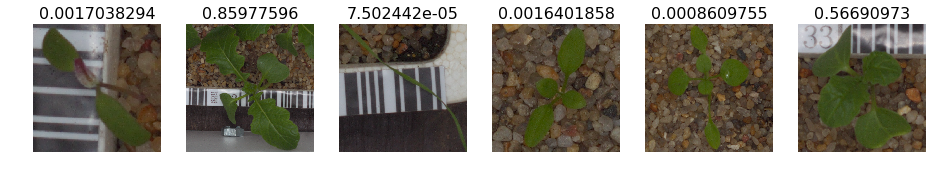

In [21]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True, 6), "Correctly classified")

In [22]:
type(rand_by_correct(True, 6)), rand_by_correct(True, 6).shape

(numpy.ndarray, (6,))

Incorrectly classified


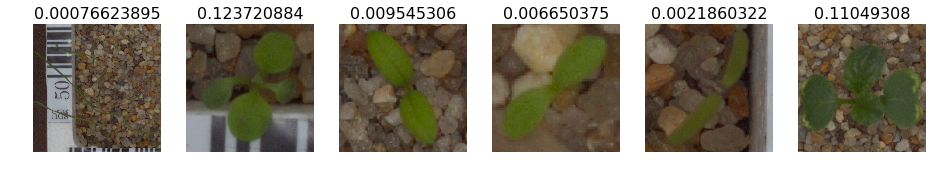

In [23]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False, 6), "Incorrectly classified")

In [24]:
def most_by_mask(mask, mult, num_selected=4):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:num_selected]]

def most_by_correct(y, is_correct, num_selected=4): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult, num_selected)

Most correct Black-grass


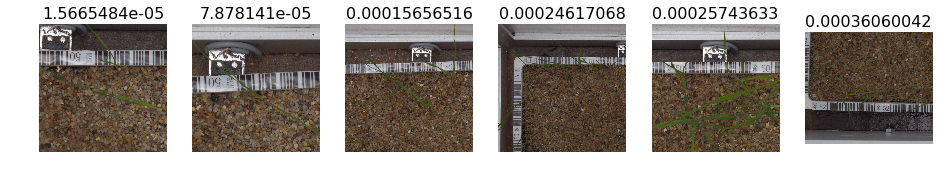

In [25]:
plot_val_with_title(most_by_correct(0, True, 6), "Most correct "+classes[0])

Most Incorrect Black-grass


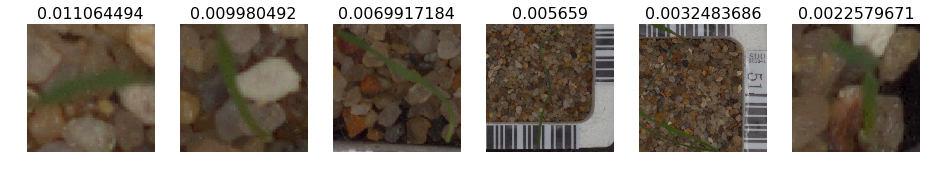

In [26]:
plot_val_with_title(most_by_correct(0, False, 6), "Most Incorrect "+classes[0])

Most correct Charlock


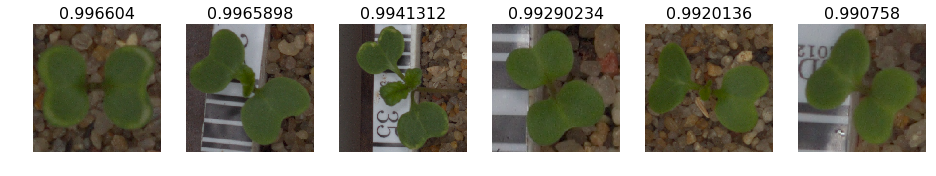

In [27]:
class_ = 1
plot_val_with_title(most_by_correct(class_, True, 6), "Most correct "+classes[class_])

Most Incorrect Charlock


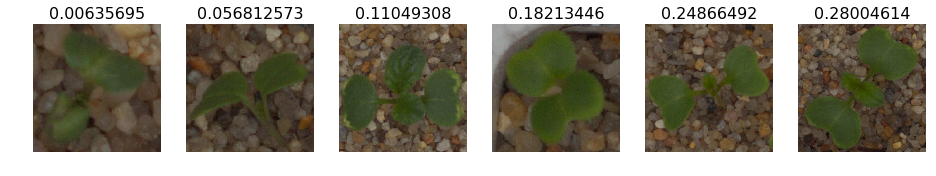

In [28]:
plot_val_with_title(most_by_correct(class_, False, 6), "Most Incorrect "+classes[class_])

Most uncertain predictions


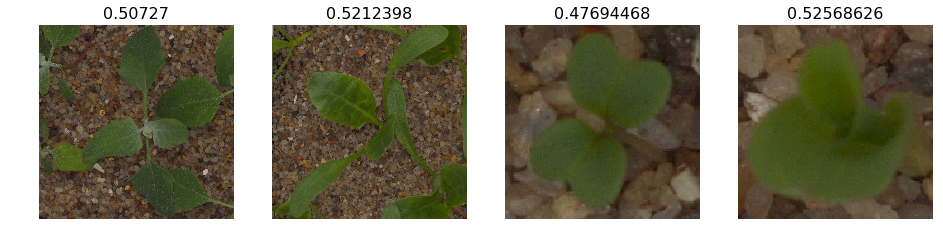

In [29]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [30]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [31]:
start_time = timeit.default_timer()
lrf=learn.lr_find()
print ("elapsed time :", timeit.default_timer() - start_time)


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 53/60 [00:01<00:00, 52.41it/s, loss=22.3]
elapsed time : 1.045649933000277                          


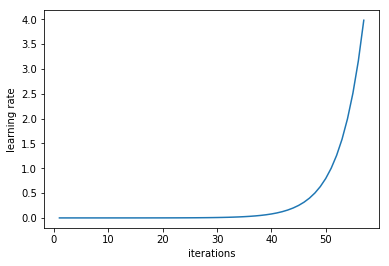

In [32]:
learn.sched.plot_lr()

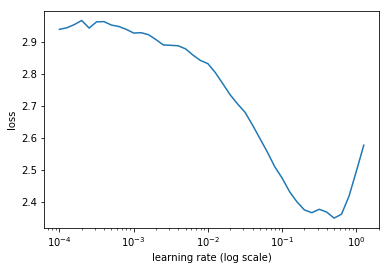

In [33]:
learn.sched.plot()

In [43]:
%%time
test_log_preds = learn.predict(is_test=True)
test_preds = np.argmax(test_log_preds, axis=1)  # from log probabilities to 0 or 1

CPU times: user 132 ms, sys: 204 ms, total: 336 ms
Wall time: 162 ms


In [68]:

print ("test_log_preds.shape:", test_log_preds.shape)
print ("test_log_preds[0]:", test_log_preds[0])
print ("test_preds.shape:", test_preds.shape)
print ("test_preds[0]:", test_preds[0], classes[test_preds[0]])
print (type(data.test_ds.fnames), len(data.test_ds.fnames), data.test_ds.fnames[0:5])

test_log_preds.shape: (794, 12)
test_log_preds[0]: [-7.50713 -7.51859 -6.19804 -5.84382 -5.2756  -2.57428 -8.44105 -4.53278 -7.21787 -8.97928 -8.85659 -0.1046 ]
test_preds.shape: (794,)
test_preds[0]: 11 Sugar beet
<class 'list'> 794 ['test/7f46a71db.png', 'test/f4ad9d950.png', 'test/e901b0f28.png', 'test/c6b76307d.png', 'test/148bbda66.png']


looking at the format required for submission.  refer sample_submission.csv
file,species
0021e90e4.png,Sugar beet
003d61042.png,Sugar beet


In [69]:
#df.to_csv('out.csv')

#construct dataframe with two columns
#data.test_ds.fnames
#test_preds[0] converted to classes

In [79]:
temp = [classes[i] for i in test_preds]
print (type(temp), len(temp))
temp[0:5]

<class 'list'> 794


['Sugar beet', 'Sugar beet', 'Fat Hen', 'Cleavers', 'Charlock']

In [80]:
[i.split("/")[1] for i in data.test_ds.fnames][0:5]

['7f46a71db.png',
 'f4ad9d950.png',
 'e901b0f28.png',
 'c6b76307d.png',
 '148bbda66.png']

In [81]:
results = pd.DataFrame({"file": [i.split("/")[1] for i in data.test_ds.fnames], 
                        "species":[classes[i] for i in test_preds]})
print (type(results), results.shape)

<class 'pandas.core.frame.DataFrame'> (794, 2)


In [82]:
results.head(5)

,file,species
0,7f46a71db.png,Sugar beet
1,f4ad9d950.png,Sugar beet
2,e901b0f28.png,Fat Hen
3,c6b76307d.png,Cleavers
4,148bbda66.png,Charlock


In [83]:
os.getcwd()

'/home/ec2-user/kaggleData/seedlings'

In [84]:
results.to_csv('seedlings_bmt_result.csv', index=False)

In [85]:
#kaggle competitions submit -c plant-seedlings-classification -f seedlings_bmt_result.csv -m "first submit"